FERKOUS SARAH 191931043867
## TP_5_DM: Classification et prédiction

In [53]:
import pandas as pd
import math
from tabulate import tabulate
import numpy as np
import random
from typing import List
import matplotlib.pyplot as plt

# KNN

In [54]:
df = pd.read_csv('Dataset-Exos.txt', names=['col1', 'col2', 'col3', 'col4', 'col5'])
df.head()

,col1,col2,col3,col4,col5
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [55]:
df.col5.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [56]:
premiere_ligne_liste = df.iloc[0].tolist()
deuxieme_ligne_liste = df.iloc[1].tolist()
premiere_ligne_liste = premiere_ligne_liste[0:-1]
deuxieme_ligne_liste = deuxieme_ligne_liste[0:-1]

In [57]:
def calcule_distance_manhattan(A, B):   
    #A et B sont deux tableau
    distance = 0
    for i in range(len(A)):
        distance = distance + abs(A[i] - B[i])
    return round(distance, 2)    

In [58]:
def calcule_distance_euclidienne(A, B):
    distance = 0
    for i in range(len(A)):
        distance = distance + (A[i] - B[i])**2
    return round(math.sqrt(distance),2)    

In [59]:
def calcule_distance_Minkowski(A, B,p=2):
    distance = 0
    for i in range(len(A)):
        distance = distance + pow(abs(A[i] - B[i]), p)
    return round(pow(distance, (1/2)), 2)    

In [60]:
def calcule_distance_cosine(A, B):
    produit_AB = 0
    for i in range(len(A)):
        produit_AB = produit_AB + (A[i]*B[i])

    contite_A = 0
    for i in range(len(A)):    
        contite_A = contite_A + A[i]**2

    contite_B = 0
    for i in range(len(B)):    
        contite_B = contite_B + B[i]**2    
    distance = 1 - (produit_AB / (math.sqrt(contite_A) * math.sqrt(contite_B)))

    return round(distance, 2)

In [61]:
def default_case():
    return "Manhattan"

In [62]:
def calcule_distance(X, Y, method):
    switcher = {
        'Manhattan': calcule_distance_manhattan,
        'Euclidienne': calcule_distance_euclidienne,
        'Minkowski': calcule_distance_Minkowski,
        'Cosine': calcule_distance_cosine
    }

    # Obtenez la fonction correspondant à la méthode ou la fonction par défaut
    func = switcher.get(method, default_case)
    
    # Exécutez la fonction avec les arguments X et Y
    return func(X, Y)

In [63]:
def TrierInstDataset(df, instance, methode):
    distance_paire = []
    for i in range(df.shape[0]):
        L = df.iloc[i].tolist()
        X = L[0:-1]
        
        #d = calcule_distance_Manhattan(X, instance)
        d = calcule_distance(X, instance, methode)
        distance_paire.append((L, d))

    distance_paire_triee = sorted(distance_paire, key=lambda x: x[1])

    return distance_paire_triee  

In [64]:
resultat_trie = TrierInstDataset(df, [5.2, 3.5 , 1.41, 0.25], 'Manhattan')
tableau_resultat = tabulate(resultat_trie, headers=["Instance", "Distance"], tablefmt="pretty")
print(tableau_resultat)

+-----------------------------------------+----------+
|                Instance                 | Distance |
+-----------------------------------------+----------+
|   [5.2, 3.5, 1.5, 0.2, 'Iris-setosa']   |   0.14   |
|   [5.1, 3.5, 1.4, 0.2, 'Iris-setosa']   |   0.16   |
|   [5.1, 3.5, 1.4, 0.3, 'Iris-setosa']   |   0.16   |
|   [5.2, 3.4, 1.4, 0.2, 'Iris-setosa']   |   0.16   |
|   [5.1, 3.4, 1.5, 0.2, 'Iris-setosa']   |   0.34   |
|   [5.0, 3.6, 1.4, 0.2, 'Iris-setosa']   |   0.36   |
|   [5.0, 3.5, 1.3, 0.3, 'Iris-setosa']   |   0.36   |
|   [5.0, 3.4, 1.5, 0.2, 'Iris-setosa']   |   0.44   |
|   [5.3, 3.7, 1.5, 0.2, 'Iris-setosa']   |   0.44   |
|   [5.5, 3.5, 1.3, 0.2, 'Iris-setosa']   |   0.46   |
|   [5.0, 3.3, 1.4, 0.2, 'Iris-setosa']   |   0.46   |
|   [5.4, 3.7, 1.5, 0.2, 'Iris-setosa']   |   0.54   |
|   [5.1, 3.8, 1.5, 0.3, 'Iris-setosa']   |   0.54   |
|   [5.1, 3.7, 1.5, 0.4, 'Iris-setosa']   |   0.54   |
|   [5.4, 3.4, 1.5, 0.4, 'Iris-setosa']   |   0.54   |
|   [5.4, 

In [65]:
from collections import Counter

def Dominante(df, resultat_trie, k):
    decision = []
    for i in range(k):
        decision.append(resultat_trie[0][0][-1])  

    # Utiliser Counter pour compter les occurrences
    comptage_classes = Counter(decision)   

    classes = dict(sorted(comptage_classes.items(), key=lambda item: item[1], reverse=True))
 
    return classes

In [66]:
C = Dominante(df, resultat_trie, 5)
C

{'Iris-setosa': 5}

In [67]:
def KNN(k, instance, methode, df):
    resultat_trie = TrierInstDataset(df, instance, methode)
    C = Dominante(df, resultat_trie, k)
    return C

In [68]:
list_of_lists = df.values.tolist()
new_list = [row[:-1] for row in list_of_lists]

In [69]:
methodes = ['Manhattan', 'Euclidienne', 'Minkowski', 'Cosine']
resultats = []

for i in methodes:
    classe = KNN(3, [5.2, 3.5, 1.41, 0.25], i, df)
    resultats.append({'Méthode': i, 'Classe Deduite': classe.keys()})

df_resultats = pd.DataFrame(resultats)

df_resultats


,Méthode,Classe Deduite
0,Manhattan,(Iris-setosa)
1,Euclidienne,(Iris-setosa)
2,Minkowski,(Iris-setosa)
3,Cosine,(Iris-setosa)


La distance de Hamming n'est pas appropriée pour ce type de données, car le dataset Iris est composé de mesures continues (float) pour les caractéristiques des fleurs

# K-means

In [70]:
def calcule_centroide(instances):
    if not instances:
        raise ValueError("Instances list is empty")

    num_dimensions = len(instances[0])
    somme = [0] * num_dimensions

    for instance in instances:
        for i in range(num_dimensions):
            somme[i] += instance[i]

    moyenne = [s / len(instances) for s in somme]

    return moyenne

O(NTK)

In [71]:
def initialise_centroides(instances, k):
    return random.sample(instances, k)

In [72]:
list_of_lists = df.values.tolist()
new_list = [row[:-1] for row in list_of_lists]

In [73]:
def visualize_clusters(instances, instance_clusters, centroides):
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(centroides))]

    for cluster_index, color in zip(range(len(centroides)), colors):
        cluster_points = [instances[i] for i in range(len(instance_clusters)) if instance_clusters[i] == cluster_index]
        cluster_points = np.array(cluster_points)  # Convert to NumPy array for better handling

        if len(cluster_points) > 0:
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=color, marker='o', label=f'Cluster {cluster_index}')

    # Plot centroids
    centroides = np.array(centroides)  # Convert to NumPy array for better handling
    plt.scatter(centroides[:, 0], centroides[:, 1], c='black', marker='x', s=200, label='Centroids')

    plt.title('K-Means Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

In [74]:
def k_means(instances, k, max_iterations=100):
    if k <= 0 or not instances:
        raise ValueError("Invalid number of clusters or empty dataset")

    centroides = initialise_centroides(instances, k)

    for _ in range(max_iterations):
        clusters = [[] for _ in range(k)]
        for i, instance in enumerate(instances):
            distances = [calcule_distance_euclidienne(instance, centroid) for centroid in centroides]
            closest_cluster_index = distances.index(min(distances))
            clusters[closest_cluster_index].append(i)

        new_centroides = [calcule_centroide([instances[i] for i in cluster]) for cluster in clusters]

        if new_centroides == centroides:
            break

        centroides = new_centroides

    # Créer une liste 'Cluster' pour chaque instance
    instance_clusters = [-1] * len(instances)

    # Attribuer les clusters à chaque instance
    for cluster_index, cluster in enumerate(clusters):
        for instance_index in cluster:
            instance_clusters[instance_index] = cluster_index
    visualize_clusters(instances, instance_clusters, centroides)
    return instance_clusters

In [75]:
df = df.drop('col5', axis=1)

In [76]:
k = 3

C:\Users\Dell\AppData\Local\Temp\ipykernel_15716\3517562915.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=color, marker='o', label=f'Cluster {cluster_index}')


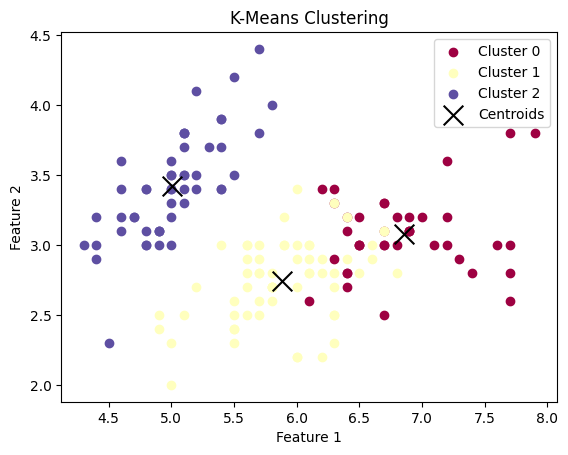

,col1,col2,col3,col4,Cluster
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [77]:
instances = df.iloc[:, :].values.tolist()
df['Cluster'] = k_means(instances, k)
df

In [78]:
df[['col1', 'col2', 'col3', 'col4']] = df[['col1', 'col2', 'col3', 'col4']].apply(pd.to_numeric, errors='coerce')

def calculate_a_b(cluster, instance, dataset, distance_function):
    a_values = []
    b_values = []

    for i in range(len(dataset)):
        if dataset.iloc[i]['Cluster'] == cluster:
            a_values.append(distance_function(instance, dataset.iloc[i, :-1]))
        else:
            b_values.append(distance_function(instance, dataset.iloc[i, :-1]))

    a = np.mean(a_values)
    b = np.min(b_values) if len(b_values) > 0 else np.inf

    return a, b


def silhouette_score(dataset, distance_function):
    scores = []

    for i in range(len(dataset)):
        instance = dataset.iloc[i, :-1]
        cluster = dataset.iloc[i]['Cluster']

        a, b = calculate_a_b(cluster, instance, dataset, distance_function)

        silhouette_i = (b - a) / max(a, b)
        scores.append(silhouette_i)

    silhouette_avg = np.mean(scores)
    return silhouette_avg

silhouette_avg = silhouette_score(df, calcule_distance_euclidienne)
print(f'Coefficient de silhouette moyen: {silhouette_avg}')

C:\Users\Dell\AppData\Local\Temp\ipykernel_15716\194251476.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  distance = distance + (A[i] - B[i])**2


Coefficient de silhouette moyen: 0.2206668919497585
